In [1]:
pip install nbformat matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, r2_score, mean_squared_error

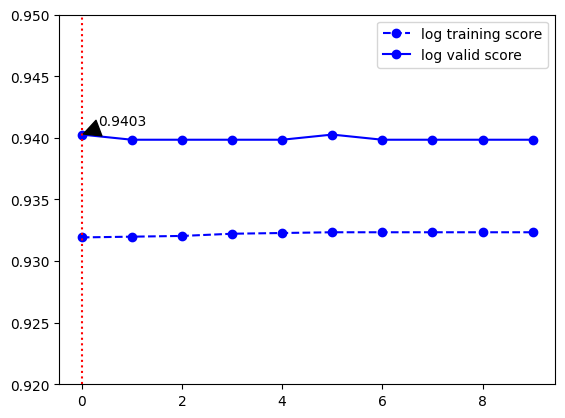

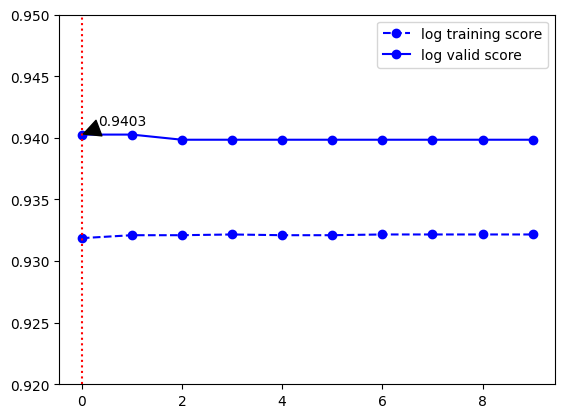

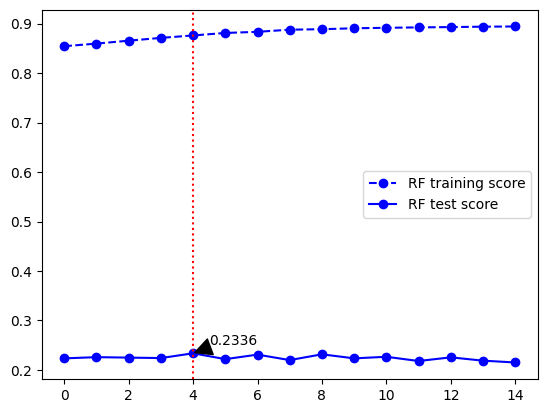

************************************************************
There are 6 set of X
X_train_selected_t1, X_train_selected_t2, X_valid_selected_t1,X_valid_selected_t2,X_test_selected_t1,X_test_selected_t2
------------------------------------------------------------
Normalized version
X_train_selected_t1_norm, X_train_selected_t2_norm, X_valid_selected_t1_norm,X_valid_selected_t2_norm,X_test_selected_t1_norm,X_test_selected_t2_norm
------------------------------------------------------------
There are 4 set of Y
y_train_t1, y_train_t2, y_valid_t1, y_valid_t2
when training, please use: 'y_train_t1_value,y_train_t2_value,y_valid_t1_value,y_valid_t2_value'
************************************************************


In [3]:
%run Data_preprocessing.ipynb

## Task 1


In [19]:
l1_ratio_list=[ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
c_list=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [14]:
# train the logistic model with different l1 ratio
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1, y_valid_t1_value)
    print("accuracy of ", l1_ratio," l1 ratio :", accuracy)
#find best l1-ratio: 0.5-0.8


accuracy of  0.1  l1 ratio : 0.9423558897243107
accuracy of  0.2  l1 ratio : 0.9423558897243107
accuracy of  0.3  l1 ratio : 0.9427736006683375
accuracy of  0.4  l1 ratio : 0.9427736006683375
accuracy of  0.5  l1 ratio : 0.9431913116123642
accuracy of  0.6  l1 ratio : 0.9431913116123642
accuracy of  0.7  l1 ratio : 0.9431913116123642
accuracy of  0.8  l1 ratio : 0.9431913116123642
accuracy of  0.9  l1 ratio : 0.9427736006683375
accuracy of  1.0  l1 ratio : 0.9427736006683375


In [22]:
# train the logistic model with different c
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.7).fit(X_train_selected_t1, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1, y_valid_t1_value)
    print("accuracy of ", c ," : ", accuracy)
#find best C: 0.1

accuracy of  0.01  :  0.9415204678362573
accuracy of  0.05  :  0.9427736006683375
accuracy of  0.1  :  0.9431913116123642
accuracy of  0.2  :  0.9427736006683375
accuracy of  0.3  :  0.9427736006683375
accuracy of  0.4  :  0.9427736006683375
accuracy of  0.5  :  0.9427736006683375
accuracy of  0.6  :  0.9427736006683375
accuracy of  0.7  :  0.9427736006683375
accuracy of  0.8  :  0.9427736006683375
accuracy of  0.9  :  0.9427736006683375
accuracy of  1.0  :  0.9427736006683375


In [17]:
clf1 = LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.7).fit(X_train_selected_t1, y_train_t1_value)
print(clf1.score(X_valid_selected_t1, y_valid_t1_value))
y_pred_1=clf1.predict(X_valid_selected_t1)

0.9431913116123642


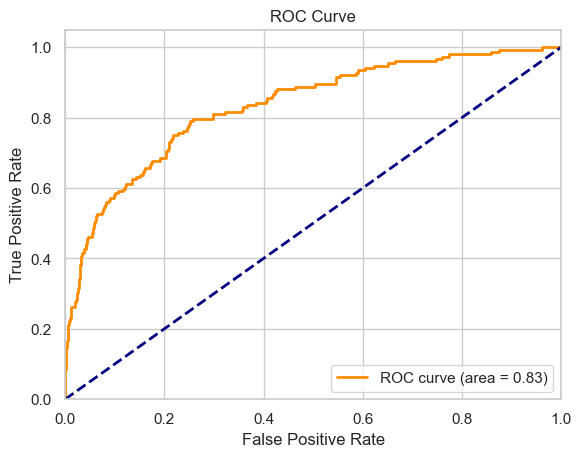

In [18]:
cm=confusion_matrix(y_valid_t1_value, y_pred_1)
y_valid_score=clf1.decision_function(X_valid_selected_t1)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [36]:
#print("R2:", r2_score(y_valid_t1_value,y_pred_1))

R2: 0.04460303300624424


Normalized

In [28]:
# train the logistic model with different l1 ratio
for l1_ratio in l1_ratio_list:
    clf = LogisticRegression(C=0.1, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=l1_ratio).fit(X_train_selected_t1_norm, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1_norm, y_valid_t1_value)
    accuracy_list.append(accuracy)
    print("accuracy of ", l1_ratio," l1 ratio :", accuracy)
#find best l1-ratio: 0.7-1.0

accuracy of  0.1  l1 ratio : 0.9411027568922306
accuracy of  0.2  l1 ratio : 0.9411027568922306
accuracy of  0.3  l1 ratio : 0.9406850459482038
accuracy of  0.4  l1 ratio : 0.9411027568922306
accuracy of  0.5  l1 ratio : 0.9415204678362573
accuracy of  0.6  l1 ratio : 0.9415204678362573
accuracy of  0.7  l1 ratio : 0.9419381787802841
accuracy of  0.8  l1 ratio : 0.9419381787802841
accuracy of  0.9  l1 ratio : 0.9419381787802841
accuracy of  1.0  l1 ratio : 0.9419381787802841


In [30]:
# train the logistic model with different c
for c in c_list:
    clf = LogisticRegression(C= c, penalty='elasticnet',solver='saga', random_state=0,multi_class='multinomial',l1_ratio=0.9).fit(X_train_selected_t1_norm, y_train_t1_value)
    accuracy=clf.score(X_valid_selected_t1_norm, y_valid_t1_value)
    accuracy_list.append(accuracy)
    print("accuracy of ", c ," :", accuracy)
#find best C: 0.05

accuracy of  0.01  : 0.9398496240601504
accuracy of  0.05  : 0.9423558897243107
accuracy of  0.1  : 0.9419381787802841
accuracy of  0.2  : 0.9411027568922306
accuracy of  0.3  : 0.9411027568922306
accuracy of  0.4  : 0.9411027568922306
accuracy of  0.5  : 0.9411027568922306
accuracy of  0.6  : 0.9411027568922306
accuracy of  0.7  : 0.9411027568922306
accuracy of  0.8  : 0.9411027568922306
accuracy of  0.9  : 0.9411027568922306
accuracy of  1.0  : 0.9411027568922306


In [31]:
clf2 = LogisticRegression(C=0.05, penalty='elasticnet',solver='saga', random_state=0,l1_ratio=0.9).fit(X_train_selected_t1_norm, y_train_t1_value)
print(clf2.score(X_valid_selected_t1_norm, y_valid_t1_value))
y_pred_2=clf2.predict(X_valid_selected_t1_norm)

0.9423558897243107


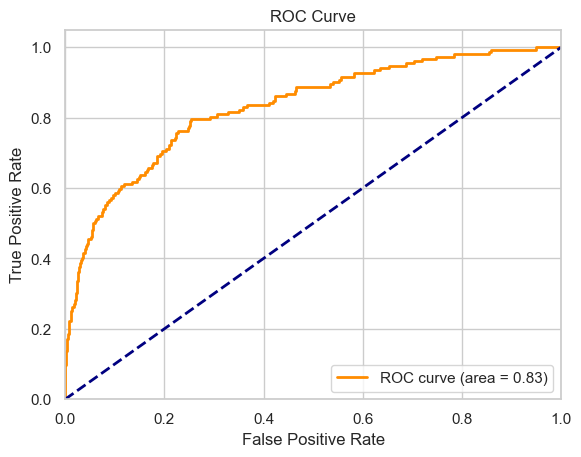

In [32]:
cm=confusion_matrix(y_valid_t1_value, y_pred_2)
y_valid_score=clf2.decision_function(X_valid_selected_t1_norm)

# compute ROC curve and AUC for each learning rate
fpr, tpr, thresholds = roc_curve(y_valid_t1_value,y_valid_score)
roc_auc = auc(fpr, tpr)

# plot the graph of ROC curve
sns.set_theme(style="whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [37]:
#print("R2:", r2_score(y_valid_t1_value,y_pred_2))

R2: 0.03055307760927728


## Task 2

In [43]:
enet_model = ElasticNet().fit(X_train_selected_t2, y_train_t2)
#print(enet_model.coef_)
#print(enet_model.intercept_)

y_pred_3 = enet_model.predict(X_valid_selected_t2)
MSE=mean_squared_error(y_valid_t2,y_pred_3)
print("MSE =", MSE)
print("RMSE =", np.sqrt(MSE))
print("R2 =", r2_score(y_valid_t2,y_pred_3))

MSE = 3.889159877220429e+32
RMSE = 1.972095301252054e+16
R2 = 0.06422411854899213


Normalized

In [47]:
enet_model = ElasticNet().fit(X_train_selected_t2_norm, y_train_t2)
#print(enet_model.coef_)
#print(enet_model.intercept_)

y_pred_4 = enet_model.predict(X_valid_selected_t2_norm)
MSE=mean_squared_error(y_valid_t2,y_pred_4)
print("MSE =", MSE)
print("RMSE =", np.sqrt(MSE))
print("R2 =", r2_score(y_valid_t2,y_pred_4))

MSE = 3.891923601022537e+32
RMSE = 1.9727958842775744e+16
R2 = 0.06393702935952283
